In [1]:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib qt

import numpy as np
from numpy import *
from scipy.fft import fft, ifft, fftshift, ifftshift
from scipy.optimize import curve_fit

import os
import scipy.io as sio


def linear_func(x, a, b):
    return a * x + b

def linear_fit(x, y):
    popt, pcov = curve_fit(linear_func, x, y)
    a = popt[0]
    b = popt[1]
    a_err = np.sqrt(pcov[0, 0])
    b_err = np.sqrt(pcov[1, 1])
    return a, b, a_err, b_err

C:\Users\Demag\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Gain_sweep_12mK2025-05-29-12-17-35.mat
[2] -----------> Gain_sweep_12mK2025-05-29-13-27-37.mat
[3] -----------> Gain_sweep_12mK2025-06-03-10-58-46.mat
[4] -----------> Gain_sweep_12mK2025-06-03-18-18-22.mat
[5] -----------> Gain_sweep_12mK_test_save2025-06-05-17-57-06.mat
[6] -----------> Gain_sweep_figs
[7] -----------> Gain_sweep_fixed_power_7db_dense2025-06-06-19-12-26.mat
[8] -----------> Gain_sweep_fixed_power_7db_dense2025-06-11-12-13-04.mat
[9] -----------> IM
[10] -----------> Noise_sweep_12mK2025-05-29-20-19-12.mat
[11] -----------> Noise_sweep_12mK2025-05-30-16-25-25.mat
[12] -----------> Noise_sweep_13mK2025-06-04-08-15-29.mat
[13] -----------> Noise_sweep_13mK_DC_lin_test_2025-06-06-11-24-25.mat
[14] -----------> Noise_sweep_13mK_power_lin_test2025-06-05-11-57-23.mat
[15] -----------> Noise_sweep_13mK_power_lin_test2025-06-05-13-25-41.mat
[16] -----------> Noise_sweep_13mK_power_lin_test_2025-06-05-18-03-38.mat
[17] -----------> No

In [198]:
file = folders[9] # [9] -----------> Noise_sweep_13mK_DC_lin_test_2025-06-06-11-24-25.mat
mat = sio.loadmat(initial_folder+"\\"+file)
data_gain = mat['data_gain']
print(data_gain.shape)
volts = mat['volts'][0]
print("Volts", volts.shape)
pump_freqs = mat['pump_freqs'][0]
print(pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print(pump_powers.shape)
data_mag = mat['data_mag'][:,0,0,:,:] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'][:,0,0,:,:] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

(101, 1, 1)
Volts (101,)
(1,)
(1,)
(101, 2, 101)
(101, 2, 101)
(101,)


C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\1716969108.py:48: RuntimeWarning: invalid value encountered in log10
  ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\1716969108.py:48: RuntimeWarning: invalid value encountered in log10
  ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\1716969108.py:48: RuntimeWarning: invalid value encountered in log10
  ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\1716969108.py:48: RuntimeWarning: invalid value encountered in log10
  ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\1716969108.py:48: RuntimeWarning: invalid value encountered in log10
  ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
C:\Users\Demag\AppData\Local\Temp\ipykernel_14920\

<ErrorbarContainer object of 3 artists>

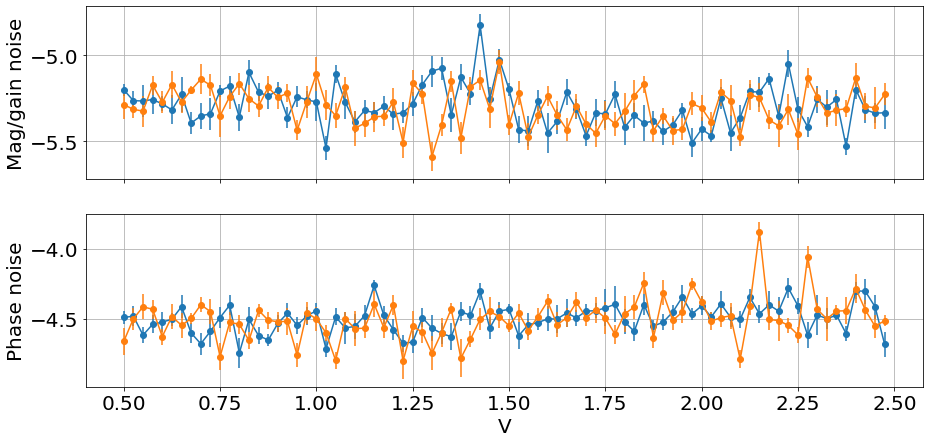

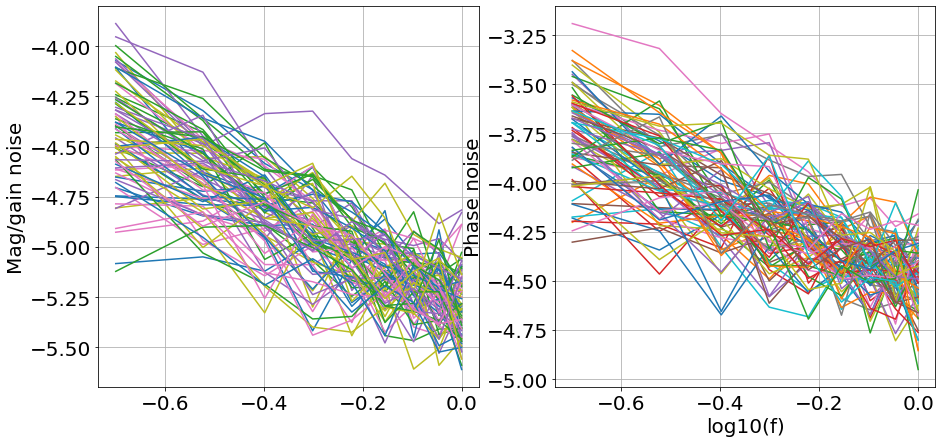

In [199]:
hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(2, 1, figsize=(15,7), sharex = True)
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel('Mag/gain noise')
ax[1].set_xlabel('V')
ax[1].set_ylabel('Phase noise')

fig2, ax2 = plt.subplots(1, 2, figsize=(15,7), sharex = True)
ax2[0].grid(True)
ax2[1].grid(True)
ax2[0].set_ylabel('Mag/gain noise')
ax2[1].set_xlabel('log10(f)')
ax2[1].set_ylabel('Phase noise')

gain_arr = np.array([])
mag_1hz_arr = np.array([])
mag_1hz_arr_ref = np.array([])

pha_1hz_arr = np.array([])
pha_1hz_arr_ref = np.array([])

mag_1hz_arr_e = np.array([])
mag_1hz_arr_ref_e = np.array([])

pha_1hz_arr_e = np.array([])
pha_1hz_arr_ref_e = np.array([])

for dc_idx in range(len(volts)):
    

    selected_gain_point = data_gain[dc_idx]
    selected_mag_point = data_mag[dc_idx]
    selected_pha_point = data_pha[dc_idx]

    if selected_mag_point[0,hz1_idx] != 0: 
        gain_arr = np.append(gain_arr, selected_gain_point)

        x = fft_freq[51:]
        y = (selected_mag_point[0,51:])#+selected_mag_point[1,51:])/2
        ax2[0].plot(np.log10(x[1:-40]), np.log10(y[1:-40]))
        am, bm, am_err, bm_err = linear_fit(np.log10(x[1:-40]), np.log10(y[1:-40]))
        mag_1hz_arr = np.append(mag_1hz_arr, np.power(10, linear_func(np.log(1), am, bm)))
        mag_1hz_arr_e = np.append(mag_1hz_arr_e, np.power(10, linear_func(np.log10(1), am_err, bm_err)))
        ax2[0].plot(np.log10(x), np.log10(linear_func(np.log10(x), am, bm)))
        
        y = selected_mag_point[1,51:]
#         ax2[0].loglog(x, y)
        am, bm, am_err, bm_err = linear_fit(np.log(x[1:-40]), np.log(y[1:-40]))
        mag_1hz_arr_ref = np.append(mag_1hz_arr_ref, np.exp(linear_func(np.log(1), am, bm)))
        mag_1hz_arr_ref_e = np.append(mag_1hz_arr_ref_e, np.exp(linear_func(np.log(1), am_err, bm_err)))
        
        x = fft_freq[51:]
        y = (selected_pha_point[0,51:])#+selected_pha_point[1,51:])/2
        ax2[1].plot(np.log10(x[1:-40]), np.log10(y[1:-40]))
        am, bm, am_err, bm_err = linear_fit(np.log10(x[1:-40]), np.log10(y[1:-40]))
        pha_1hz_arr = np.append(pha_1hz_arr, np.power(10,linear_func(np.log10(1), am, bm)))
        pha_1hz_arr_e = np.append(pha_1hz_arr_e, np.power(10, linear_func(np.log10(1), am_err, bm_err)))
        
        y = selected_pha_point[1,51:]
#         ax2[1].loglog(x, y)
        am, bm, am_err, bm_err = linear_fit(np.log(x[1:-40]), np.log(y[1:-40]))
        pha_1hz_arr_ref = np.append(pha_1hz_arr_ref, np.exp(linear_func(np.log(1), am, bm)))
        pha_1hz_arr_ref_e = np.append(pha_1hz_arr_ref_e, np.exp(linear_func(np.log(1), am_err, bm_err)))
        
        

ax[0].errorbar(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr), yerr=np.log10(mag_1hz_arr_e), fmt='o-')
ax[1].errorbar(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr), yerr=np.log10(pha_1hz_arr_e), fmt='o-')

ax[0].errorbar(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr_ref), yerr=np.log10(mag_1hz_arr_ref_e), fmt='o-')
ax[1].errorbar(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr_ref), yerr=np.log10(pha_1hz_arr_ref_e), fmt='o-')

In [3]:
initial_folder = r'C:\Users\Demag\PycharmProjects\ColdMeasurements\DeMag\DATA\TWPA_noise_9'

folders = os.listdir(initial_folder)
for i in range(len(folders)):
    if ".fig" in folders[i]: pass
    else: 
        print(r"[%d]" %(i), '----------->', folders[i])

[0] -----------> 1st_tone
[1] -----------> Gain_sweep_12mK2025-05-29-12-17-35.mat
[2] -----------> Gain_sweep_12mK2025-05-29-13-27-37.mat
[3] -----------> Gain_sweep_12mK2025-06-03-10-58-46.mat
[4] -----------> Gain_sweep_12mK2025-06-03-18-18-22.mat
[5] -----------> Gain_sweep_12mK_test_save2025-06-05-17-57-06.mat
[6] -----------> Gain_sweep_figs
[7] -----------> Gain_sweep_fixed_power_7db_dense2025-06-06-19-12-26.mat
[8] -----------> Gain_sweep_fixed_power_7db_dense2025-06-11-12-13-04.mat
[9] -----------> IM
[10] -----------> Noise_sweep_12mK2025-05-29-20-19-12.mat
[11] -----------> Noise_sweep_12mK2025-05-30-16-25-25.mat
[12] -----------> Noise_sweep_13mK2025-06-04-08-15-29.mat
[13] -----------> Noise_sweep_13mK_DC_lin_test_2025-06-06-11-24-25.mat
[14] -----------> Noise_sweep_13mK_power_lin_test2025-06-05-11-57-23.mat
[15] -----------> Noise_sweep_13mK_power_lin_test2025-06-05-13-25-41.mat
[16] -----------> Noise_sweep_13mK_power_lin_test_2025-06-05-18-03-38.mat
[17] -----------> No

In [4]:
file = folders[17] # [12] -----------> Noise_sweep_13mK_power_lin_test_2025-06-05-18-03-38.mat
mat = sio.loadmat(initial_folder+"\\"+file)
data_gain = mat['data_gain']
print(data_gain.shape)
volts = mat['volts'][0]
print("Volts", volts.shape)
pump_freqs = mat['pump_freqs'][0]
print(pump_freqs.shape)
pump_powers = mat['pump_powers'][0]
print(pump_powers.shape)
data_mag = mat['data_mag'][:,0,0] # on/off
print(data_mag.shape)
data_pha = mat['data_pha'][:,0,0] # on/off
print(data_pha.shape)
fft_freq = mat['fft_freq'][0] # on/off
print(fft_freq.shape)

(81, 1001, 13)
Volts (81,)
(1001,)
(13,)
(81, 2, 101)
(81, 2, 101)
(101,)


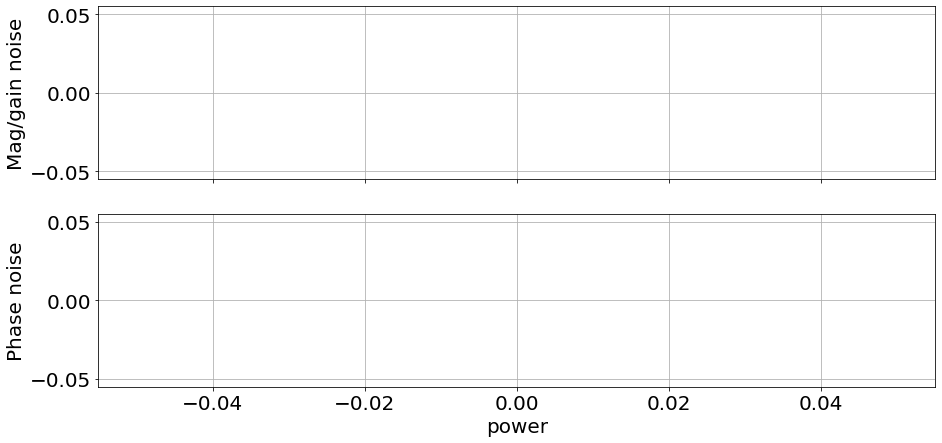

In [5]:
hz1_idx = 60

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig2, ax = plt.subplots(2, 1, figsize=(15,7), sharex = True)
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel('Mag/gain noise')
ax[1].set_xlabel('power')
ax[1].set_ylabel('Phase noise')

gain_arr = np.array([])
mag_1hz_arr = np.array([])
mag_1hz_arr_ref = np.array([])

pha_1hz_arr = np.array([])
pha_1hz_arr_ref = np.array([])

mag_1hz_arr_err = np.array([])
mag_1hz_arr_ref_err = np.array([])

pha_1hz_arr_err = np.array([])
pha_1hz_arr_ref_err = np.array([])

tr = -1
for dc_idx in range(len(volts)):

    selected_gain_point = data_gain[dc_idx]
    selected_mag_point = data_mag[dc_idx]
    selected_pha_point = data_pha[dc_idx]

    if selected_mag_point[0,hz1_idx] != 0 and selected_mag_point[0,hz1_idx] != nan: 

        gain_arr = np.append(gain_arr, selected_gain_point)

        x = fft_freq[151:]
        y = selected_mag_point[0,151:]
        am, bm, am_err, bm_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
        mag_1hz_arr = np.append(mag_1hz_arr, np.power(10, linear_func(np.log10(1), am, bm)))
        mag_1hz_arr_err = np.append(mag_1hz_arr_err, np.power(10, linear_func(np.log10(1), am_err, bm_err)))

        y = selected_pha_point[0,151:]
        ap, bp, ap_err, bp_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
        pha_1hz_arr = np.append(pha_1hz_arr, np.power(10, linear_func(np.log10(1), ap, bp)))
        pha_1hz_arr_err = np.append(pha_1hz_arr_err, np.power(10, linear_func(np.log10(1), ap_err, bp_err)))

        
        y = selected_mag_point[1,151:]
        am, bm, am_err, bm_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
        mag_1hz_arr_ref = np.append(mag_1hz_arr_ref, np.power(10, linear_func(np.log10(1), am, bm)))
        mag_1hz_arr_ref_err = np.append(mag_1hz_arr_ref_err, np.power(10, linear_func(np.log10(1), am_err, bm_err)))

        y = selected_pha_point[1,151:]
        ap, bp, ap_err, bp_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
        pha_1hz_arr_ref = np.append(pha_1hz_arr_ref, np.power(10, linear_func(np.log10(1), ap, bp)))
        pha_1hz_arr_ref_err = np.append(pha_1hz_arr_ref_err, np.power(10, linear_func(np.log10(1), ap_err, bp_err)))

# ax[0].errorbar(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr), yerr=mag_1hz_arr_err, fmt='o-',)
# ax[1].errorbar(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr), yerr=pha_1hz_arr_err, fmt='o-',)
# ax[0].errorbar(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr_ref), yerr=mag_1hz_arr_ref_err, fmt='o--',)
# ax[1].errorbar(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr_ref),yerr=pha_1hz_arr_ref_err, fmt='o--',)


ax[0].plot(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr))
ax[1].plot(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr))
ax[0].plot(volts[:len(mag_1hz_arr)], np.log10(mag_1hz_arr_ref))
ax[1].plot(volts[:len(mag_1hz_arr)], np.log10(pha_1hz_arr_ref))

In [6]:
%matplotlib qt

In [7]:
selected_gain_point = data_gain[5]
selected_mag_point = data_mag[5]
selected_pha_point = data_pha[5]

fig2, ax = plt.subplots(1, 2, figsize=(15,7), sharex = True)
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel('Mag/gain noise')
ax[1].set_xlabel('power')
ax[1].set_ylabel('Phase noise')

tr = -5
if selected_mag_point[0,hz1_idx] != 0: 

    gain_arr = np.append(gain_arr, selected_gain_point)

    x = fft_freq[51:]
    y = selected_mag_point[0,51:]
    am, bm, am_err, bm_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
    mag_1hz_arr = np.power(10, linear_func(np.log10(1), am, bm))
    mag_1hz_arr_err = linear_func(np.log10(1), am_err, bm_err)
    ax[0].plot(np.log10(x[:tr]), np.log10(y[:tr]))
    ax[0].plot(np.log10(x[:tr]), linear_func(np.log10(x[:tr]), am, bm), 'r--' )

    y = selected_pha_point[0,51:]
    ap, bp, ap_err, bp_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
    pha_1hz_arr = np.power(10, linear_func(np.log10(1), ap, bp))
    pha_1hz_arr_err =  np.power(10, linear_func(np.log10(1), ap_err, bp_err))
    ax[1].plot(np.log10(x[:tr]), np.log10(y[:tr]))
    ax[0].plot(np.log10(x[:tr]), linear_func(np.log10(x[:tr]), am, bm), 'r--' )

    y = selected_mag_point[1,51:]
    am, bm, am_err, bm_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
    mag_1hz_arr_ref = np.power(10, linear_func(np.log10(1), am, bm))
    mag_1hz_arr_ref_err =  np.power(10, linear_func(np.log10(1), am_err, bm_err))
    ax[0].plot(np.log10(x[:tr]), np.log10(y[:tr]))

    y = selected_pha_point[1,51:]
    ap, bp, ap_err, bp_err = linear_fit(np.log10(x[:tr]), np.log10(y[:tr]))
    pha_1hz_arr_ref = np.power(10, linear_func(np.log10(1), ap, bp))
    pha_1hz_arr_ref_err =  np.power(10, linear_func(np.log10(1), ap_err, bp_err))
    ax[1].plot(np.log10(x[:tr]), np.log10(y[:tr]))
    





In [229]:
len(np.linspace(0, 4, 101))*40/60/24

2.8055555555555554

In [230]:
np.linspace(0, 4, 101)

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
       2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 ,
       2.64, 2.68, 2.72, 2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  , 3.04,
       3.08, 3.12, 3.16, 3.2 , 3.24, 3.28, 3.32, 3.36, 3.4 , 3.44, 3.48,
       3.52, 3.56, 3.6 , 3.64, 3.68, 3.72, 3.76, 3.8 , 3.84, 3.88, 3.92,
       3.96, 4.  ])